# titanic-machine-learning

Use the "Run" button to execute the code.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # Seaborn for visulisation
import matplotlib.pyplot as plt ## for visulisation
from scipy.stats import skew
from scipy .stats import shapiro
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df= pd.read_csv('gender_submission (1).csv')
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [3]:
df_train = pd.read_csv('train (2).csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
## Shape of the data : Total number of rows and total number of columns
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [6]:
### Information about test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Data Preprocessing

#### a.) Handling Null values

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
## Replacing all the null values in age column with mean 
df_train['Age']=df_train['Age'].fillna(df_train.groupby(['Pclass','Sex'])['Age'].transform('mean').astype(int))
df_train['Age'].isnull().sum()

0

In [9]:
## now drop the column Cabin as there are lot nf null values
df_train.drop(['Cabin'],axis =1,inplace=True)

In [10]:
## Null values in Embarked 
df_train['Embarked']=df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_train['Embarked'].isnull().sum()

0

In [11]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Note: All the null values in train dataset has been cleared

### Visulisation of survived variable on basis of other varaibles

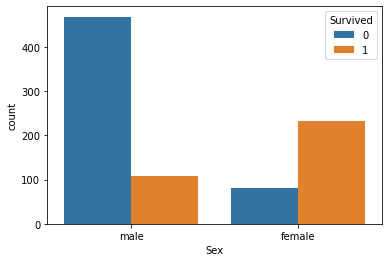

In [12]:
##Survived people based on gender

sns.countplot(data=df_train,x='Sex',hue='Survived')
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

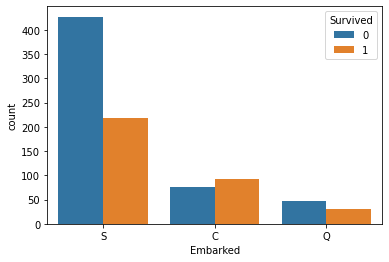

In [13]:
## Survived people basis on place of embarked .
sns.countplot(data=df_train,x='Embarked',hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

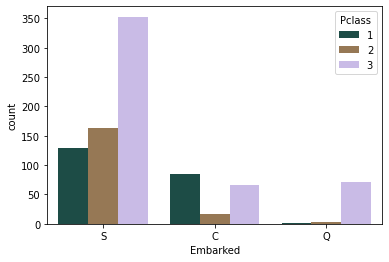

In [14]:
## Adding the class variable in above graph to get more detailed insight

sns.countplot(data=df_train,x='Embarked',hue='Pclass',palette='cubehelix')

<AxesSubplot:xlabel='Pclass', ylabel='Total'>

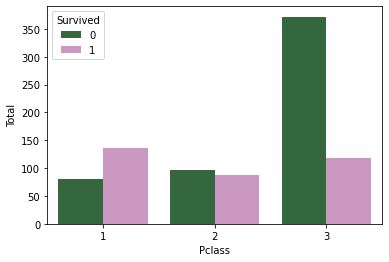

In [15]:
## Now showing survived people on basis of place from where people embaeked and class in which people traveled

a=df_train.groupby(['Pclass','Survived']).size().reset_index().rename(columns={0:'Total'})
sns.barplot(data= a, x='Pclass',y='Total',hue='Survived',palette='cubehelix')

#### b.) Handling Numerical values in train dataset

In [16]:
## List of Numerical values
## Use list comprehension 

num_features= [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']

print('Total Numerical variables:' , len(num_features))

df_train[num_features].head()

Total Numerical variables: 7


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [17]:
## Findig Discrete Numerical values

discrete_feature = [feature for feature in num_features if len(df_train[feature].unique()) < 25 and feature not in ['PassengerID']]
print('Discrete Variable Count: {}'.format(len(discrete_feature)))
discrete_feature

Discrete Variable Count: 4


['Survived', 'Pclass', 'SibSp', 'Parch']

In [18]:
### Continuous Features

continuos_feature=[feature for feature in num_features if feature not in discrete_feature and feature not in ['PassengerId']]
continuos_feature

['Age', 'Fare']

##### Histogram to check distribution of data in numerical variable

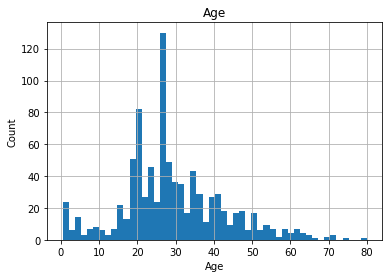

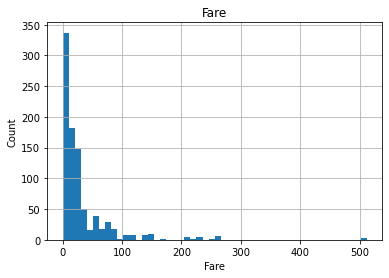

In [19]:
## Histrogram to check distribution of continuos_feature

for feature in continuos_feature:
    d2=df_train.copy()
    d2[feature].hist(bins=50)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Obesrvation: As data in the Fare column is not normally distributed so need to convert the data into normally distributed data with the help of logrithmic transformation

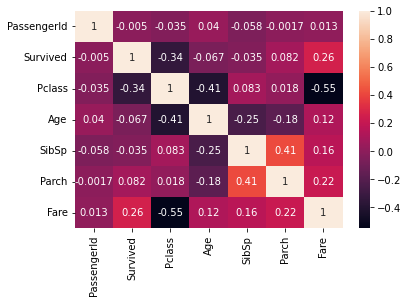

In [20]:
## Check the relation of continuous factor with dependent feature
sns.heatmap(df_train.corr(),annot=True)
plt.show()

As shown in heatmap Survived column and Fare column values are not highly correlated.It is good to normalise the Fare column distribution. And Age variable is already normally distributed.

#### Normalise data in Fare column

Log normal transformation has been applied to normalie the data. Important point to be note that it is necessary to exclude observation which has 0 value in Fare column. 

In [21]:
data2= df_train[df_train['Fare'] != 0]
data2['Fare']=np.log(data2['Fare'])
data2

/tmp/ipykernel_40/3746674836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Fare']=np.log(data2['Fare'])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.564949,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,3.154870,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.401197,C


0.44236249049829257

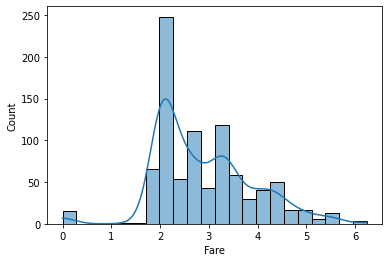

In [22]:
data3= df_train[df_train['Fare'] == 0]
frames=[data2,data3]
df_final_train=pd.concat(frames)
df_final_train
sns.histplot(x='Fare',kde=True,data=df_final_train)
skew(df_final_train['Fare'])

#### c.) Categorical variable

In [23]:
cat_features= [feature for feature in df_final_train.columns if df_final_train[feature].dtypes == 'O']

print('Total Numerical variables:' , len(cat_features))

df_final_train[cat_features].head()


Total Numerical variables: 4


,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [24]:
# Drop the Name Column
df_final_train.drop(['Name'],axis=1,inplace=True)

In [25]:
# Mapping the value to Sex Column
# map 0 to male and 1 to female

df_final_train['Sex']=df_final_train['Sex'].map({'male':'0','female':'1'})

In [26]:
## convert the embark  column variable
df_embarkedcat = pd.get_dummies(df_final_train['Embarked'],drop_first=True)

In [27]:
## Concat this to main dataframe
df_final_train = pd.concat([df_final_train,df_embarkedcat],axis=1)

In [28]:
df_final_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
0,1,0,3,0,22.0,1,0,A/5 21171,1.981001,S,0,1
1,2,1,1,1,38.0,1,0,PC 17599,4.266662,C,0,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,2.070022,S,0,1
3,4,1,1,1,35.0,1,0,113803,3.972177,S,0,1
4,5,0,3,0,35.0,0,0,373450,2.085672,S,0,1


In [29]:
## Drop the Embarked column
df_final_train.drop(['Embarked'],axis=1,inplace=True)

In [30]:
#  Drop the  ticket column also
df_final_train.drop(['Ticket'],axis=1,inplace = True)

#### d.) Managing outlires in dataset

<AxesSubplot:>

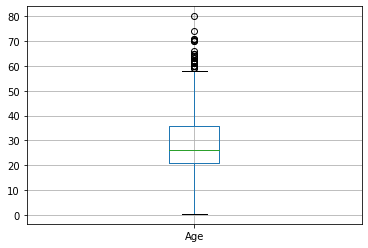

In [31]:
## Visulisation of outliers using box plot

df_final_train.boxplot(column='Age')

In [32]:
## Drop all the observation with Age value > 59
print(len(df_final_train[df_final_train['Age'] > 59]))
df_final_train.drop(df_final_train[df_final_train['Age'] > 59].index , inplace=True)
df_final_train[df_final_train['Age'] > 59]

26


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S


<AxesSubplot:>

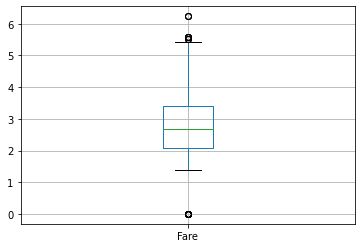

In [33]:
## Visulisation of outliers using box plot

df_final_train.boxplot(column='Fare')

In [34]:
## Removing the outliers from Fare column
df_final_train.drop(df_final_train[df_final_train['Fare'] > 5.3].index , inplace=True)

In [35]:
df_final_train.drop(df_final_train[df_final_train['Fare'] == 0].index , inplace=True)

In [36]:
### drop the passenger ir column
df_final_train.drop('PassengerId',axis=1,inplace=True)

Trained dataset has been processed for data modeling.

### Training the Model for prediction

In [37]:
## Training the model for prediction
df_final_train_x=df_final_train.drop('Survived',axis=1)
df_final_train_y=df_final_train['Survived']

In the above code two different dataframe one with dependent variable and other with independent variabale to train the model and scaling of the data.

#### Scaling the data

In [38]:
scaler=StandardScaler()

In [39]:
df_final_train_x=scaler.fit_transform(df_final_train_x)

#### Applying Logistic regression

In [40]:
logimodel=LogisticRegression()
logimodel.fit(df_final_train_x,df_final_train_y)

LogisticRegression()

In [41]:
print(logimodel.coef_)

[[-0.89075015  1.22760044 -0.58333788 -0.49446578 -0.08801332  0.25650737
  -0.01035814 -0.14597179]]


In [42]:
print(logimodel.intercept_)

[-0.64367099]


Here the value of the intercept is less then 0 so probability of survived persons is less than 50 percent.

#### Preprocessing test data for making predictions

In [43]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Clearing the Null values in test data


In [44]:
df_test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
## Drop cabin column
df_test.drop(['Cabin'],axis=1,inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [46]:
## Replacing all the null values in age column with mean 
df_test['Age']=df_test['Age'].fillna(df_test.groupby(['Pclass','Sex'])['Age'].transform('mean').astype(int))
df_test['Age'].isnull().sum()

0

In [47]:
### Replacing null values in fare column with mode
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mode()[0])

In [48]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Numerical variable in test dataset

In [50]:
num_features_test= [feature for feature in df_test.columns if df_test[feature].dtypes != 'O']

print('Total Numerical variables:' , len(num_features_test))

num_features_test

Total Numerical variables: 6


['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [52]:
### 1. Discrete variables 
discrete_feature_test = [feature for feature in num_features_test if len(df_train[feature].unique()) < 25 and feature not in ['PassengerID']]
print('Discrete Variable Count: {}'.format(len(discrete_feature_test)))
discrete_feature_test

Discrete Variable Count: 3


['Pclass', 'SibSp', 'Parch']

In [53]:
## Continuous feature in test data

continuos_feature_test=[feature for feature in num_features_test if feature not in discrete_feature_test and feature not in ['PassengerId']]
continuos_feature_test

['Age', 'Fare']

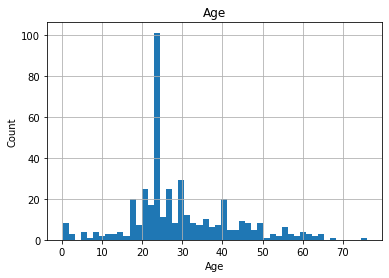

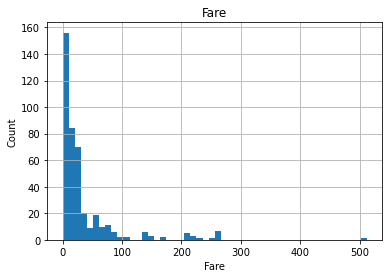

In [54]:
## Histogram to check distribution of numerical columns

for feature in continuos_feature_test:
    d3=df_test.copy()
    d3[feature].hist(bins=50)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [55]:
skew(df_test['Age'])

0.6748328381059637

In [56]:
skew(df_test['Fare'])

3.678339656294148

Observation:

Age Column: As it is visible in graph and also skewness level indicate that age column is not skewed.

Fare Column: As Fare column is heavily skewd on right side , It is good to normalise the Fare column

#### Normalising the fare column

In [60]:
data_2= df_test[df_test['Fare'] != 0]
data_2['Fare']=np.log(data_2['Fare'])
data_2

/tmp/ipykernel_40/2093053178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Fare']=np.log(data_2['Fare'])


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.057860,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,1.945910,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.270836,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.159003,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.508582,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,2.085672,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,4.690430,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,1.981001,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,2.085672,S


0.837616182950216

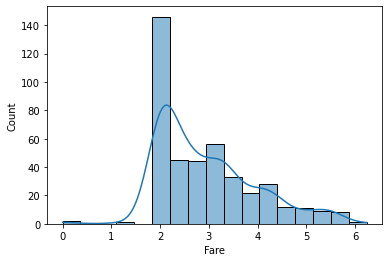

In [62]:
data_3= df_test[df_test['Fare'] == 0]
frames_1=[data_2,data_3]
df_final_test=pd.concat(frames_1)
df_final_test
sns.histplot(x='Fare',kde=True,data=df_final_test)
skew(df_final_test['Fare'])

#### Categorical features in test data

In [63]:
cat_features_test= [feature for feature in df_final_test.columns if df_final_test[feature].dtypes == 'O']

print('Total Numerical variables:' , len(cat_features_test))

df_final_test[cat_features_test].head()

Total Numerical variables: 4


,Name,Sex,Ticket,Embarked
0,"Kelly, Mr. James",male,330911,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,S
2,"Myles, Mr. Thomas Francis",male,240276,Q
3,"Wirz, Mr. Albert",male,315154,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,S


In [64]:
## Drop the name column
df_final_test.drop({'Name','Ticket'}, axis=1,inplace=True)

In [65]:
# map 0 to male and 1 to female

df_final_test['Sex']=df_final_test['Sex'].map({'male':'0','female':'1'})

In [66]:
## convert the embark  column variable
df_embarkedcat_test = pd.get_dummies(df_final_test['Embarked'],drop_first=True)
df_final_test = pd.concat([df_final_test,df_embarkedcat_test],axis=1)

In [67]:
## Drop the Embarked Column
df_final_test.drop(['Embarked'],axis=1,inplace=True)

In [68]:
df_final_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,892,3,0,34.5,0,0,2.057860,1,0
1,893,3,1,47.0,1,0,1.945910,0,1
2,894,2,0,62.0,0,0,2.270836,1,0
3,895,3,0,27.0,0,0,2.159003,0,1
4,896,3,1,22.0,1,1,2.508582,0,1
...,...,...,...,...,...,...,...,...,...
415,1307,3,0,38.5,0,0,1.981001,0,1
416,1308,3,0,24.0,0,0,2.085672,0,1
417,1309,3,0,24.0,1,1,3.107198,0,0
266,1158,1,0,40.0,0,0,0.000000,0,1


In [69]:
## Merge the two dataframes
df_final_test=df_final_test.merge(df,on='PassengerId')

#### Finding and removing outliers in test data

<AxesSubplot:>

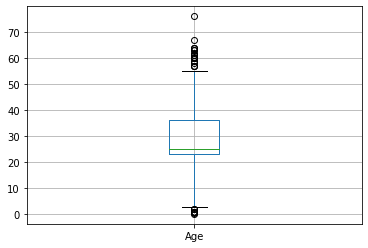

In [70]:
## Visulisation of outliers using box plot

df_final_test.boxplot(column='Age')

In [72]:
df_final_test.drop(df_final_test[df_final_test['Age'] > 55].index , inplace= True)
df_final_test.drop(df_final_test[df_final_test['Age'] < 5].index , inplace= True)

<AxesSubplot:>

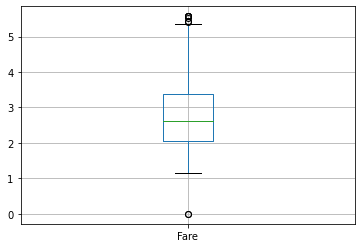

In [73]:
df_final_test.boxplot(column='Fare')

In [74]:
df_final_test.drop(df_final_test[df_final_test['Fare'] > 5.4].index,inplace=True)
df_final_test.drop(df_final_test[df_final_test['Fare'] == 0].index, inplace=True)

In [75]:
df_final_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,Survived
0,892,3,0,34.5,0,0,2.057860,1,0,0
1,893,3,1,47.0,1,0,1.945910,0,1,1
3,895,3,0,27.0,0,0,2.159003,0,1,0
4,896,3,1,22.0,1,1,2.508582,0,1,1
5,897,3,0,14.0,0,0,2.221917,0,1,0
...,...,...,...,...,...,...,...,...,...,...
411,1305,3,0,24.0,0,0,2.085672,0,1,0
412,1306,1,1,39.0,0,0,4.690430,0,0,1
413,1307,3,0,38.5,0,0,1.981001,0,1,0
414,1308,3,0,24.0,0,0,2.085672,0,1,0


In [76]:
# drop passengerID column
df_final_test.drop('PassengerId',axis=1,inplace=True)

Now test dataset is processed for making prediction

#### Predicting for the test data

In [77]:
df_final_test_x=df_final_test.drop('Survived',axis=1)
df_final_test_y=df_final_test['Survived']

#### Scaling the test data

In [78]:
df_final_test_x=scaler.fit_transform(df_final_test_x)

In [79]:
predictions=logimodel.predict(df_final_test_x)

In [80]:
classification_report(df_final_test_y,predictions)

'              precision    recall  f1-score   support\n\n           0       0.94      0.93      0.93       248\n           1       0.87      0.89      0.88       130\n\n    accuracy                           0.92       378\n   macro avg       0.90      0.91      0.91       378\nweighted avg       0.92      0.92      0.92       378\n'

In [81]:
confusion_matrix(df_final_test_y,predictions)

array([[230,  18],
       [ 14, 116]])

In [82]:
accuracy_score(df_final_test_y,predictions)

0.9153439153439153

Conclusion : confusion matrix is giving result of 92 % and accuracy_score is also 91 % . So it is possible to say that we can apply this model for survival rate prediction.